<a href="https://colab.research.google.com/github/hrk022/mnist_with_pytorch/blob/main/Mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [ ]:
torch.manual_seed(42)

In [ ]:
df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


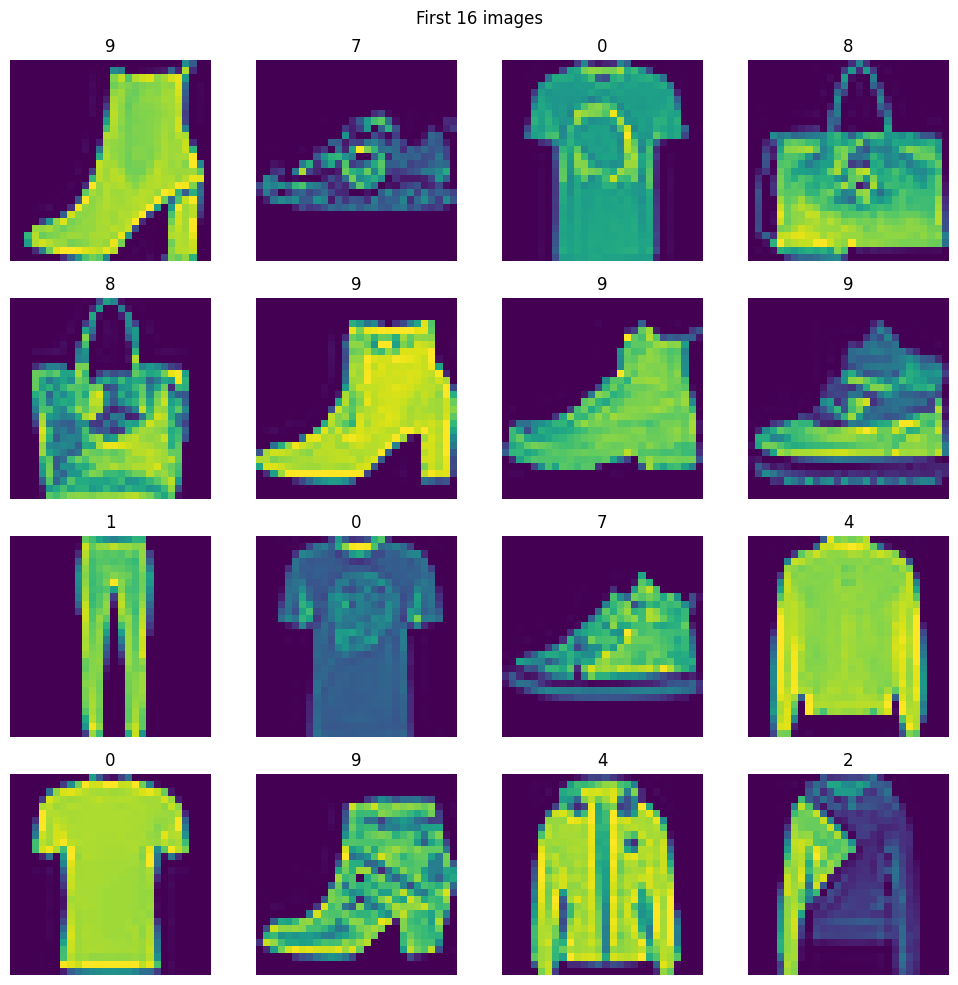

In [ ]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images")

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(df.iloc[i,0])

plt.tight_layout()
plt.show()

In [ ]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [ ]:
X_train = X_train/255.0
X_test =  X_test/255.0

In [ ]:
#creating custom data

class CustomDataset(Dataset):
  def __init__(self,feature,label):
    self.feature = torch.from_numpy(feature).float()
    self.label = torch.from_numpy(label).long()

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index):
    return self.feature[index],self.label[index]

In [ ]:
#train & test dataset
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [ ]:
#train & test dataloader
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=64,shuffle=False)

In [ ]:
#creating nn
class MyNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(28*28,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(64,10),
    )
#creating forward
  def forward(self,x):
    return self.model(x)

In [ ]:
model = MyNN()

#loss function
loss_fn = nn.CrossEntropyLoss()

#optim
optimizer = optim.SGD(model.parameters(),lr=0.01,weight_decay=1e-4)

In [ ]:
#training loop
epochs = 100
for epochs in range(epochs):
  total_epochs_loss = 0
  for batch_feature, batch_label in train_dataloader:

    #forward passs
    outputs = model(batch_feature) #feeding input data into the model

    # calculate loss
    loss = loss_fn(outputs,batch_label) #compare the output and calculate how wrong the model is.

    #backward
    optimizer.zero_grad() #clears old gradient for the last step
    loss.backward() #how much each weight in the model contributed to the loss

    #update grads
    optimizer.step()

    total_epochs_loss += loss.item()
  avg_loss = total_epochs_loss/len(train_dataloader)
  print(f"Epoch: {epochs + 1} : {loss}")

Epoch: 1 : 1.539882779121399
Epoch: 2 : 1.1773641109466553
Epoch: 3 : 0.9296712875366211
Epoch: 4 : 0.762251615524292
Epoch: 5 : 0.8553828001022339
Epoch: 6 : 0.6005794405937195
Epoch: 7 : 0.7583857178688049
Epoch: 8 : 0.6864280104637146
Epoch: 9 : 0.6524660587310791
Epoch: 10 : 0.5563377141952515
Epoch: 11 : 0.5646344423294067
Epoch: 12 : 0.4869348406791687
Epoch: 13 : 0.6036801338195801
Epoch: 14 : 0.840266227722168
Epoch: 15 : 0.5293425917625427
Epoch: 16 : 0.4293655753135681
Epoch: 17 : 0.5207325220108032
Epoch: 18 : 0.593522310256958
Epoch: 19 : 0.392189085483551
Epoch: 20 : 0.4679815173149109
Epoch: 21 : 0.5311149954795837
Epoch: 22 : 0.3253623843193054
Epoch: 23 : 0.40035000443458557
Epoch: 24 : 0.42053356766700745
Epoch: 25 : 0.6260085105895996
Epoch: 26 : 0.4591760039329529
Epoch: 27 : 0.3810587525367737
Epoch: 28 : 0.49532952904701233
Epoch: 29 : 0.3559359908103943
Epoch: 30 : 0.5253883600234985
Epoch: 31 : 0.33238357305526733
Epoch: 32 : 0.527276873588562
Epoch: 33 : 0.32450

In [ ]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#evaluation_mode (using test loader)

total = 0;
correct = 0;
with torch.no_grad():
  for batch_feature, batch_label in test_dataloader:
    outputs = model(batch_feature)
    _, predicted = torch.max(outputs,1)
    total += batch_label.size(0)
    correct += (predicted == batch_label).sum().item()

print(correct)
print(total)
accuracy = correct/total
print(f"Accuracy: {accuracy*100:.2f}")

1496
1800
Accuracy: 83.11
